In [2]:
import numpy as np
import scipy.stats as ss
import seaborn as sns
from tqdm import tqdm
# Устанавливаем seed для воспроизводимости результатов
np.random.seed(1337)

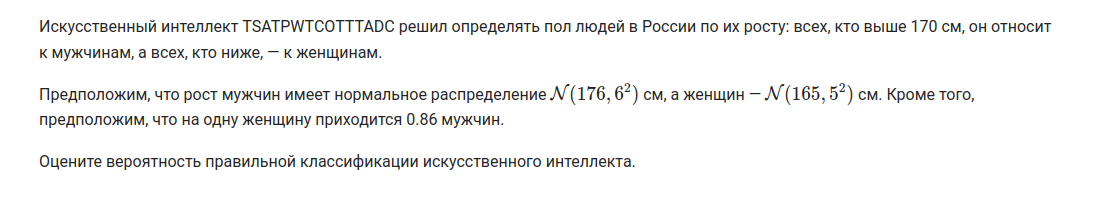

0.841308


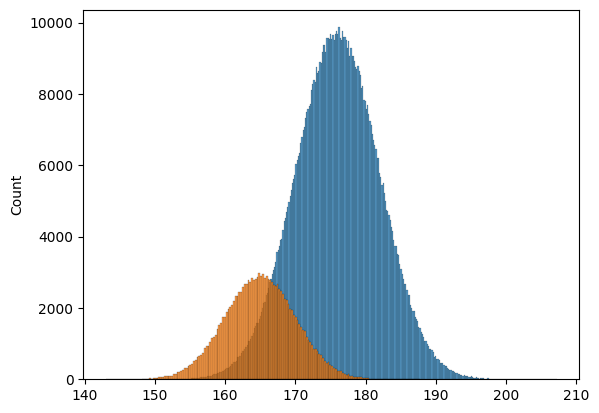

In [20]:
N = 1_000_000
b = ss.bernoulli(0.86).rvs(size=N)
men_sample = ss.norm(176, 6).rvs(size=(b == 1).sum())
women_sample = ss.norm(165, 5).rvs(size=(b == 0).sum())

sns.histplot(men_sample)
sns.histplot(women_sample)
print(((men_sample > 170).sum() + (women_sample <= 170).sum())/N)

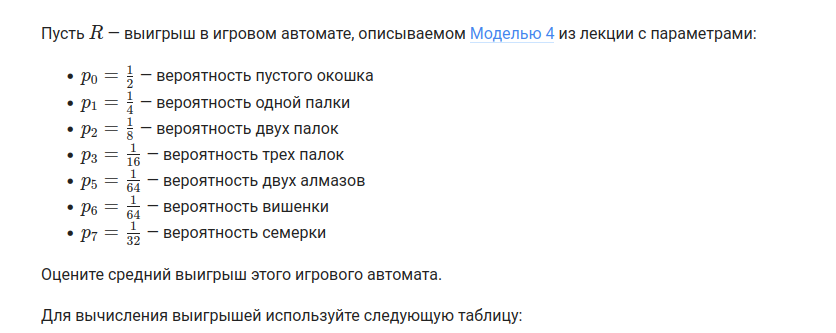

In [25]:
reward_table = {(0, 0, 0): 0,
 (0, 0, 1): 0,
 (0, 0, 2): 0,
 (0, 0, 3): 0,
 (0, 0, 5): 0,
 (0, 0, 6): 2,
 (0, 0, 7): 0,
 (0, 1, 1): 0,
 (0, 1, 2): 0,
 (0, 1, 3): 0,
 (0, 1, 5): 0,
 (0, 1, 6): 2,
 (0, 1, 7): 0,
 (0, 2, 2): 0,
 (0, 2, 3): 0,
 (0, 2, 5): 0,
 (0, 2, 6): 2,
 (0, 2, 7): 0,
 (0, 3, 3): 0,
 (0, 3, 5): 0,
 (0, 3, 6): 2,
 (0, 3, 7): 0,
 (0, 5, 5): 0,
 (0, 5, 6): 10,
 (0, 5, 7): 0,
 (0, 6, 6): 5,
 (0, 6, 7): 2,
 (0, 7, 7): 0,
 (1, 1, 1): 10,
 (1, 1, 2): 5,
 (1, 1, 3): 5,
 (1, 1, 5): 20,
 (1, 1, 6): 2,
 (1, 1, 7): 0,
 (1, 2, 2): 5,
 (1, 2, 3): 5,
 (1, 2, 5): 10,
 (1, 2, 6): 2,
 (1, 2, 7): 0,
 (1, 3, 3): 5,
 (1, 3, 5): 10,
 (1, 3, 6): 2,
 (1, 3, 7): 0,
 (1, 5, 5): 40,
 (1, 5, 6): 10,
 (1, 5, 7): 0,
 (1, 6, 6): 5,
 (1, 6, 7): 2,
 (1, 7, 7): 0,
 (2, 2, 2): 25,
 (2, 2, 3): 5,
 (2, 2, 5): 50,
 (2, 2, 6): 2,
 (2, 2, 7): 0,
 (2, 3, 3): 5,
 (2, 3, 5): 10,
 (2, 3, 6): 2,
 (2, 3, 7): 0,
 (2, 5, 5): 100,
 (2, 5, 6): 10,
 (2, 5, 7): 0,
 (2, 6, 6): 5,
 (2, 6, 7): 2,
 (2, 7, 7): 0,
 (3, 3, 3): 40,
 (3, 3, 5): 80,
 (3, 3, 6): 2,
 (3, 3, 7): 0,
 (3, 5, 5): 160,
 (3, 5, 6): 10,
 (3, 5, 7): 0,
 (3, 6, 6): 5,
 (3, 6, 7): 2,
 (3, 7, 7): 0,
 (5, 5, 5): 1000,
 (5, 5, 6): 40,
 (5, 5, 7): 320,
 (5, 6, 6): 20,
 (5, 6, 7): 10,
 (5, 7, 7): 160,
 (6, 6, 6): 10,
 (6, 6, 7): 5,
 (6, 7, 7): 2,
 (7, 7, 7): 80}

In [54]:
probs = [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/32]
dist = ss.rv_discrete(values=([0, 1, 2, 3, 5, 6, 7], probs))
sample = dist.rvs(size=(1_000_000, 3))
sample = np.sort(sample, axis=1)


In [55]:
result = []
for s in sample:
    result.append(reward_table[tuple(s)])

0.858662

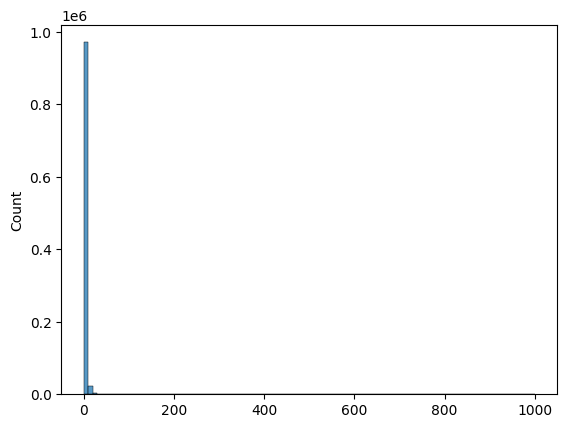

In [57]:
sns.histplot(result, bins=100)
np.mean(result)

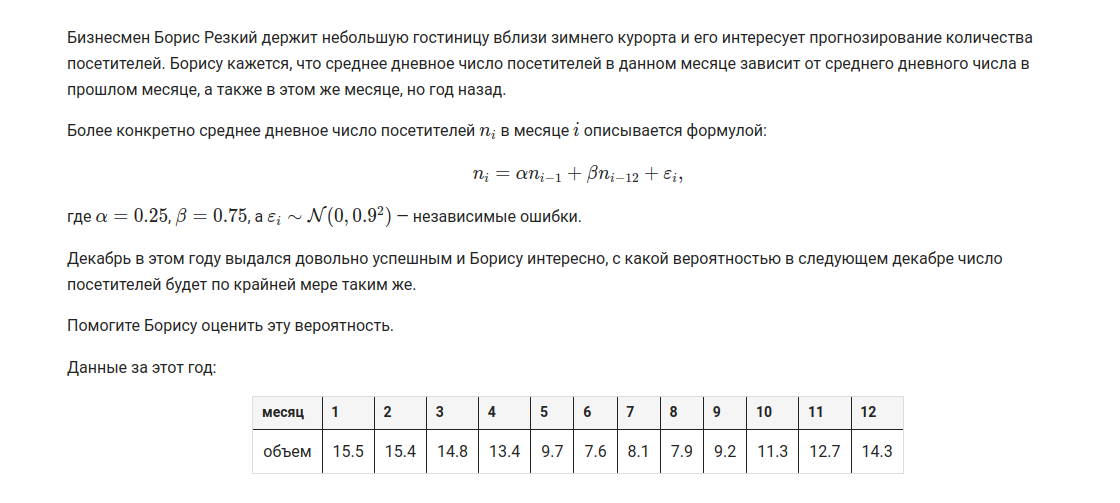

In [146]:
N = 1_000
alpha = 0.25
beta = 0.75

error = ss.norm(0, 0.9)

data = [15.5, 15.4, 14.8, 13.4, 9.7, 7.6, 8.1, 7.9, 9.2, 11.3, 12.7, 14.3]

def model_pred(month, prev_month):
    return alpha * prev_month + beta * data[month] + error.rvs(1)[0]

result = []
for i in tqdm(range(N)):
    prev_month = data[-1]
    for month in range(12):
        prev_month = model_pred(month, prev_month)
    result.append(prev_month)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 5151.35it/s]


0.291

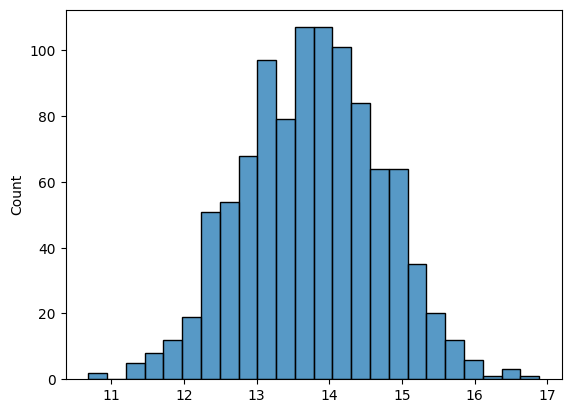

In [147]:
sns.histplot(result)
(np.array(result) >= data[-1]).mean()

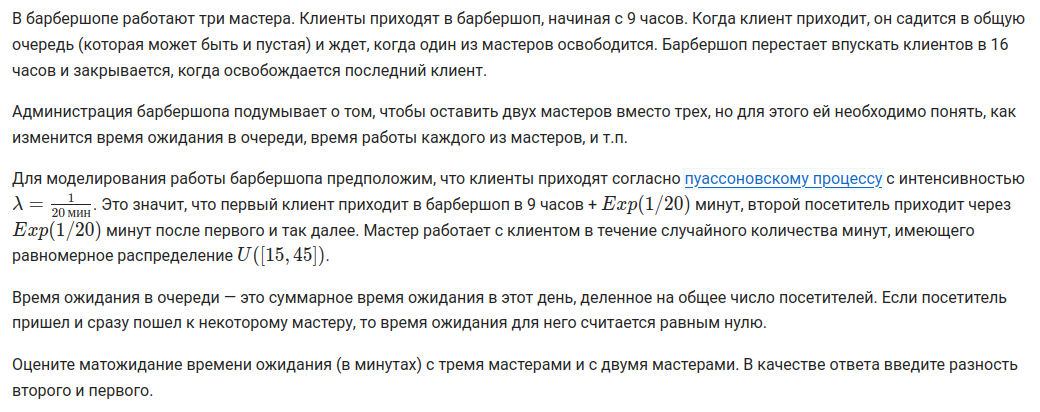

100%|██████████| 1000/1000 [00:19<00:00, 51.76it/s]


11.629030721693505


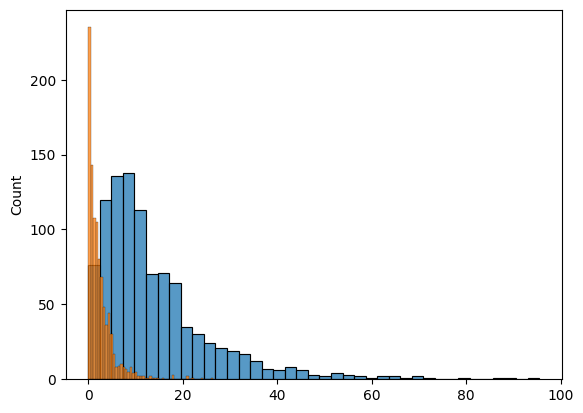

In [877]:
haircut_time_low = 15
haircut_time_high = 45
n_hours=8

N = 1_000
await_3 = []
await_2 = []

def calc_await_times(n_haircutters):
    await_times = []
    haircutters_time = np.zeros(n_haircutters)
    clients_time = ss.expon(scale=20).rvs(100).cumsum()
    for client_time in clients_time:
        if client_time > n_hours * 60:
            break
        haircutter_idx = haircutters_time.argmin()
        haircutter_time = haircutters_time[haircutter_idx]

        await_time = max(0, haircutter_time - client_time)

        await_times.append(await_time)
        
        haircut_time = ss.uniform(haircut_time_low, haircut_time_high - haircut_time_low).rvs(1)[0]
        haircut_time = haircut_time + max(client_time, haircutter_time)
        
        haircutters_time[haircutter_idx] = haircut_time
    return np.array(await_times)


for i in tqdm(range(N)):
    await_3.append(calc_await_times(3).mean())
    await_2.append(calc_await_times(2).mean())
    
await_2 = np.array(await_2)
await_3 = np.array(await_3)

sns.histplot(await_2)
sns.histplot(await_3)
print(np.mean(await_2) - np.mean(await_3))